# Data Loading

In [4]:
# 유방암인지 일반 종양인지 데이터 분류
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Bunch 데이터 형태 
cancer = load_breast_cancer()

# 데이터 분할 진행 (데이터 나오는 순서 중요)
# stratify = 레이블이 범주형일때만 사용 가능함 > 층화추출 > 범주별로 데이터를 분리 (범주 비율이 train, test 가 동일해진다)
x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    stratify=cancer['target'], #층화추출 진행 (분류별 문제에서는 범주 갯수 고려)
                                                    random_state=0)
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

# Voting

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 모델 하이퍼파라메터를 따로 줄 수 있음. 보팅에 참여할 분류기를 따로 만들 수 있다.
knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000)
dt3 = DecisionTreeClassifier(max_depth=3)
dt5 = DecisionTreeClassifier(max_depth=5)

In [13]:
# VotingClassifier
from sklearn.ensemble import VotingClassifier

# '모델 이름', 모델 변수를 만들어서 넣어줌 
# models = [('knn1', knn1)]
hard = VotingClassifier([('knn1', knn1), ('knn2', knn2), ('lr', lr),
                         ('dt3', dt3), ('dt5', dt5)], voting='hard').fit(x_train, y_train) # 모델별로 예측된 범주를 집계 

soft = VotingClassifier([('knn1', knn1), ('knn2', knn2), ('lr', lr),
                         ('dt3', dt3), ('dt5', dt5)], voting='soft').fit(x_train, y_train) # 모델별로 예측된 확률을 집계 

In [14]:
hard.score(x_train, y_train), hard.score(x_test, y_test)

(0.9812206572769953, 0.951048951048951)

In [15]:
soft.score(x_train, y_train), soft.score(x_test, y_test)

(0.9953051643192489, 0.958041958041958)

### Voting (hard, soft) + 개별 예측 모형의 정확도 확인

In [17]:
names = ['hard', 'soft', 'knn1', 'knn2', 'lr', 'dt3', 'dt5']
for idx, model in enumerate([hard, soft, knn1, knn2, lr, dt3, dt5]):
    model.fit(x_train, y_train)
    name = names[idx]
    train_score = model.score(x_train, y_train) * 100
    test_score = model.score(x_test, y_test) * 100
    print(f'{name} Train Accuracy:{train_score:.2f}%')
    print(f'{name} Test Accuracy:{test_score:.2f}%')
    print()

hard Train Accuracy:98.12%
hard Test Accuracy:95.10%

soft Train Accuracy:99.53%
soft Test Accuracy:95.80%

knn1 Train Accuracy:94.60%
knn1 Test Accuracy:91.61%

knn2 Train Accuracy:95.77%
knn2 Test Accuracy:91.61%

lr Train Accuracy:96.71%
lr Test Accuracy:93.71%

dt3 Train Accuracy:97.65%
dt3 Test Accuracy:93.01%

dt5 Train Accuracy:100.00%
dt5 Test Accuracy:92.31%



In [18]:
# VotingRegressor 동일함 
from sklearn.ensemble import VotingRegressor
VotingRegressor

sklearn.ensemble._voting.VotingRegressor

# Bagging - RandomForest

In [25]:
# RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9440559440559441)

In [38]:
# RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

# n_estimators
# - 분류기를 몇 개 만들 것인가? (Decision Tree) 많으면 많을수록 좋은게 아니다. 일정 수준까지만 올라가고 일정 시점 이후에는 성능이 안좋아짐 
# max_depth : DT의 최대 깊이를 어느 정도로 지정하는가? 

model = RandomForestClassifier(n_estimators=100, max_depth=5).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9440559440559441)

In [39]:
model.feature_importances_ # RandomForest 변수중요도 자잘하게 나온다

array([0.03924855, 0.01050127, 0.04834051, 0.05503275, 0.00594819,
       0.01042229, 0.03933029, 0.12315893, 0.00312351, 0.00220324,
       0.00976531, 0.00484508, 0.01582211, 0.03268619, 0.00186927,
       0.00375932, 0.00444756, 0.00237155, 0.00149789, 0.00233023,
       0.08847965, 0.01292558, 0.10956469, 0.15119562, 0.01186813,
       0.01340696, 0.02922555, 0.15377911, 0.00664361, 0.00620707])

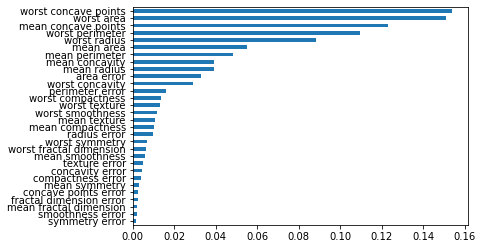

In [45]:
import pandas as pd 

fi = pd.Series(model.feature_importances_, index=cancer["feature_names"])
fi.sort_values().plot(kind='barh')

# Boosting - GradientBoosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, max_depth=4).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9440559440559441)

In [47]:
model.feature_importances_ # 특정한 계수가 높게 나온다.  한두개 정도만 나오는 경우 

array([4.63079763e-05, 2.94914223e-02, 5.48732885e-05, 1.40358577e-03,
       1.66968098e-03, 1.84535707e-08, 1.29011055e-05, 4.89251041e-02,
       7.08585701e-03, 4.04452941e-07, 8.20007840e-04, 8.82079328e-04,
       3.07358899e-07, 1.18371786e-02, 5.36408382e-05, 6.42484143e-04,
       4.36793930e-06, 1.71707030e-02, 1.68956265e-08, 9.82884745e-04,
       1.04367082e-02, 3.50684236e-02, 7.28854158e-01, 2.05636416e-02,
       2.58688988e-03, 4.95627787e-14, 1.19275994e-03, 7.79001064e-02,
       1.53106512e-03, 7.82421430e-04])

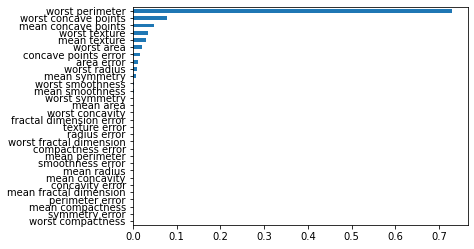

In [48]:
fi = pd.Series(model.feature_importances_, index=cancer["feature_names"])
fi.sort_values().plot(kind='barh')

In [53]:
from sklearn.datasets import load_boston

boston = load_boston()

x_train2, x_test2, y_train2, y_test2 = train_test_split(boston["data"], boston["target"], 
                                                       random_state=0)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train2, y_train2)
model.score(x_train2, y_train2), model.score(x_test2, y_test2)

(0.7697699488741149, 0.635463843320211)

In [56]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(x_train2, y_train2)
model.score(x_train2, y_train2), model.score(x_test2, y_test2)

(0.9817734999787731, 0.8111468951056511)

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(x_train2, y_train2)
model.score(x_train2, y_train2), model.score(x_test2, y_test2)

(0.9829864654169255, 0.8182224772311157)

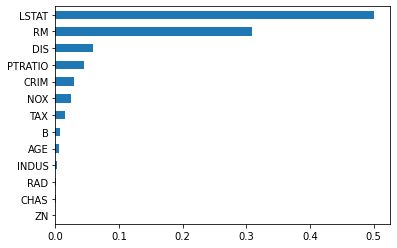

In [60]:
pd.Series(model.feature_importances_, index=boston['feature_names']).sort_values().plot(kind='barh')

# Grid-Search - 분류

In [96]:
from sklearn.datasets import load_breast_cancer
# CV 교차검증 -> 데이터를 동일한 크기로 분할(Fold) -> 각 Fold를 Test로 지정하여 여러번 실험
from sklearn.model_selection import GridSearchCV # CV : 교차검증 수행 , 값이 높은 모델을 Best로 선정함 
from sklearn.ensemble import GradientBoostingClassifier

# Bunch 데이터 형태 
cancer = load_breast_cancer()

# Baseline 모델 
model = GradientBoostingClassifier(random_state=0)

# 주어지는 파라메터에 따라 속도가 매우 오래 걸릴 수 있다.
params = {
    'learning_rate' : [0.01, 0.01, 0.1], # 앞선 모델의 오류를 얼만큼 반영 할 것인지?
    'max_depth' : [3, 4, 5], # DT의 최대 깊이 
    'max_features' : [10, 20] # 최대 사용 가능한 특성의 개수
}  

# GridSearchCV 수행시 데이터를 train, test로 분할하지 않아도 됨
gs = GridSearchCV(model, params).fit(cancer.data, cancer.target)
gs

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.01, 0.1],
                         'max_depth': [3, 4, 5], 'max_features': [10, 20]})

In [97]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.178892,0.000851,0.000961,0.000037,0.01,3,10,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.947368,0.929825,0.973684,0.973684,0.973451,0.959603,0.018027,6
1,0.280536,0.000893,0.001085,0.000211,0.01,3,20,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.947368,0.929825,0.956140,0.964912,0.973451,0.954339,0.015032,9
2,0.235911,0.000883,0.001008,0.000020,0.01,4,10,"{'learning_rate': 0.01, 'max_depth': 4, 'max_f...",0.938596,0.929825,0.956140,0.973684,0.973451,0.954339,0.017841,9
3,0.367631,0.002010,0.001013,0.000015,0.01,4,20,"{'learning_rate': 0.01, 'max_depth': 4, 'max_f...",0.938596,0.929825,0.947368,0.973684,0.964602,0.950815,0.016216,15
4,0.304068,0.001554,0.001098,0.000031,0.01,5,10,"{'learning_rate': 0.01, 'max_depth': 5, 'max_f...",0.938596,0.921053,0.964912,0.973684,0.964602,0.952569,0.019655,13
5,0.462068,0.001667,0.001099,0.000026,0.01,5,20,"{'learning_rate': 0.01, 'max_depth': 5, 'max_f...",0.929825,0.929825,0.947368,0.964912,0.973451,0.949076,0.017827,17
6,0.178310,0.001338,0.000965,0.000016,0.01,3,10,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.947368,0.929825,0.973684,0.973684,0.973451,0.959603,0.018027,6
7,0.279667,0.000443,0.000989,0.000040,0.01,3,20,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.947368,0.929825,0.956140,0.964912,0.973451,0.954339,0.015032,9
8,0.235769,0.000877,0.001053,0.000042,0.01,4,10,"{'learning_rate': 0.01, 'max_depth': 4, 'max_f...",0.938596,0.929825,0.956140,0.973684,0.973451,0.954339,0.017841,9
9,0.367466,0.001611,0.001036,0.000029,0.01,4,20,"{'learning_rate': 0.01, 'max_depth': 4, 'max_f...",0.938596,0.929825,0.947368,0.973684,0.964602,0.950815,0.016216,15


In [98]:
GradientBoostingClassifier(**gs.best_params_)

GradientBoostingClassifier(max_features=10)

# Grid-Search - 회귀

In [91]:
from sklearn.datasets import load_boston
# CV 교차검증 -> 데이터를 동일한 크기로 분할(Fold) -> 각 Fold를 Test로 지정하여 여러번 실험
from sklearn.model_selection import GridSearchCV # CV : 교차검증 수행 , 값이 높은 모델을 Best로 선정함 
# 회귀모델에서는 MAE, MSE, RMSE 사용함. 낮을수록 좋음 
from sklearn.ensemble import GradientBoostingRegressor

boston = load_boston()

# Baseline 모델 
model = GradientBoostingRegressor(random_state=0)

# 주어지는 파라메터에 따라 속도가 매우 오래 걸릴 수 있다.
params = {
    'n_estimators' : [100, 300, 500], # 분류기의 개수 
    'learning_rate' : [0.01, 0.01, 0.1], # 앞선 모델의 오류를 얼만큼 반영 할 것인지?
    'max_depth' : [3, 4, 5], # DT의 최대 깊이 
    'max_features' : [7, 10] # 최대 사용 가능한 특성의 개수
}  

# GridSearchCV 수행시 데이터를 train, test로 분할하지 않아도 됨
# 회귀모델 사용시
# - scoring='neg_mean_absolute_error' : MAE가 낮을 수록 좋은 모델 선택
#           'neg_mean_squared_error' : MSE가 낮은 수록 좋은 모델 선택
# 결과는 마이너스가 나올텐데 여기에 * -1 해주면 된다. (부호 무시해도 됨)
gs = GridSearchCV(model, params, scoring='neg_mean_absolute_error').fit(boston.data, boston.target)
gs

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.01, 0.01, 0.1],
                         'max_depth': [3, 4, 5], 'max_features': [7, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_absolute_error')

In [92]:
pd.DataFrame(gs.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080341,0.001025,0.000847,0.000034,0.01,3,7,100,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",-2.991279,-3.838458,-5.163388,-5.081986,-4.457233,-4.306469,0.813293,51
1,0.238571,0.002959,0.001224,0.000040,0.01,3,7,300,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",-2.313580,-2.595349,-3.508240,-3.964360,-3.154779,-3.107262,0.598272,37
2,0.397003,0.004998,0.001532,0.000040,0.01,3,7,500,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",-2.274481,-2.588614,-3.219857,-3.723926,-2.947703,-2.950916,0.501739,19
3,0.098731,0.001367,0.000864,0.000020,0.01,3,10,100,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",-2.976407,-3.804186,-5.460877,-5.095924,-4.421125,-4.351704,0.892207,53
4,0.291461,0.004177,0.001186,0.000071,0.01,3,10,300,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",-2.293343,-2.539757,-3.692916,-3.890901,-3.124648,-3.108313,0.623202,39


In [93]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
50,0.542775,0.008299,0.002183,0.000010,0.1,5,7,500,"{'learning_rate': 0.1, 'max_depth': 5, 'max_fe...",-2.165439,-2.822227,-2.906266,-3.459570,-2.988546,-2.868410,0.415123,1
48,0.109170,0.001421,0.000978,0.000040,0.1,5,7,100,"{'learning_rate': 0.1, 'max_depth': 5, 'max_fe...",-2.184135,-2.794347,-2.933148,-3.458599,-2.973726,-2.868791,0.409224,2
49,0.326223,0.005072,0.001606,0.000033,0.1,5,7,300,"{'learning_rate': 0.1, 'max_depth': 5, 'max_fe...",-2.167164,-2.820053,-2.908010,-3.460485,-2.988572,-2.868857,0.414884,3
32,0.541026,0.009114,0.002433,0.000066,0.01,5,7,500,"{'learning_rate': 0.01, 'max_depth': 5, 'max_f...",-2.135044,-2.695517,-3.063603,-3.483198,-2.996440,-2.874761,0.447207,4
14,0.540464,0.008107,0.002426,0.000036,0.01,5,7,500,"{'learning_rate': 0.01, 'max_depth': 5, 'max_f...",-2.135044,-2.695517,-3.063603,-3.483198,-2.996440,-2.874761,0.447207,4
39,0.097725,0.001142,0.000826,0.000014,0.1,3,10,100,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",-2.157122,-2.745370,-3.463629,-3.353399,-2.763140,-2.896532,0.472799,6
26,0.467809,0.005656,0.001921,0.000052,0.01,4,7,500,"{'learning_rate': 0.01, 'max_depth': 4, 'max_f...",-2.208418,-2.743499,-3.130612,-3.495194,-2.915315,-2.898608,0.426718,7
8,0.467507,0.006561,0.001899,0.000052,0.01,4,7,500,"{'learning_rate': 0.01, 'max_depth': 4, 'max_f...",-2.208418,-2.743499,-3.130612,-3.495194,-2.915315,-2.898608,0.426718,7
36,0.079640,0.001135,0.000829,0.000017,0.1,3,7,100,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",-2.179902,-2.833312,-3.016203,-3.629251,-2.844869,-2.900707,0.462890,9
38,0.395299,0.005328,0.001485,0.000020,0.1,3,7,500,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",-2.231168,-2.943253,-2.877771,-3.710966,-2.777924,-2.908217,0.473695,10


In [94]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 7, 'n_estimators': 500}

In [95]:
# 최적 선정된 모델의 Best Parameter로 GradientBoostingRegressor 생성 
GradientBoostingRegressor(**gs.best_params_).fit(x_test, y_test)

GradientBoostingRegressor(max_depth=5, max_features=7, n_estimators=500)

# Stacking

In [99]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier()), 
              ('gb', GradientBoostingClassifier())]

model = StackingClassifier(estimators=estimators,
                         final_estimator=LogisticRegression())

model.fit(x_train, y_train).score(x_test, y_test)

0.951048951048951

In [100]:
StackingClassifier

sklearn.ensemble._stacking.StackingClassifier

# XGBoost

In [11]:
!pip install xgboost

In [101]:
import xgboost as xgb

# 또는 
from xgboost import XGBClassifier # 분류모델 
from xgboost import XGBRFRegressor # 회귀모델

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
    
boston = load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston['data'],
                                                    boston['target'],
                                                    random_state=0)
# 튜닝해야 하는 파라메터가 많다
model = xgb.XGBRegressor(objective ='reg:linear')
model.fit(x_train, y_train)

p_train = model.predict(x_train)
p_test = model.predict(x_test)

r2_score(y_train, p_train), r2_score(y_test, p_test)

[13:55:28] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


(0.999999003030776, 0.7476326752660457)

In [14]:
!pip install lightgbm

# LightGBM

In [15]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

boston = load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston['data'],
                                                    boston['target'],
                                                    random_state=0)

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

params = {
    'objective': 'regression',
}

model = lgb.train(params, lgb_train, valid_sets=lgb_eval,
                  early_stopping_rounds=5)

p_train = model.predict(x_train, num_iteration=model.best_iteration)
p_test = model.predict(x_test, num_iteration=model.best_iteration)

r2_score(y_train, p_train), r2_score(y_test, p_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 379, number of used features: 13
[LightGBM] [Info] Start training from score 22.608707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 70.5396
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 61.4369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 53.753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 47.6561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 42.6525
[LightGBM] [Warning] No furth

(0.9524522112992748, 0.7369037475494296)

In [ ]:
# 데이터 세트 준비
from sklearn.datasets import load_digits


# 데이터 분할


# 모델 평가 (가장 좋은 Classification 모델을 찾아보세요.)



In [16]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
boston = load_boston()

model = GradientBoostingRegressor(random_state=0)

params = {
    'n_estimators' : [100, 300, 500],
    'learning_rate' : [0.01, 0.01, 0.1],
    'max_depth' : [3, 4, 5],
}

gs = GridSearchCV(model, params).fit(boston.data, boston.target)
gs

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [17]:
import pandas as pd
report = pd.DataFrame(gs.cv_results_)
report

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.085770,0.001784,0.000598,4.886555e-04,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.622020,0.688112,0.220861,0.325642,-0.175309,0.336265,0.310029,24
1,0.254120,0.003796,0.000997,9.536743e-08,0.01,3,300,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.756358,0.865449,0.691776,0.484630,0.314734,0.622589,0.197722,9
2,0.421473,0.006600,0.000997,3.162980e-07,0.01,3,500,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.762956,0.867336,0.738485,0.535428,0.380540,0.656949,0.175110,4
3,0.105722,0.001900,0.000399,4.886361e-04,0.01,4,100,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.633338,0.626206,0.314555,0.374583,-0.252105,0.339315,0.322612,22
4,0.315756,0.004575,0.000997,1.907349e-07,0.01,4,300,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.756735,0.807186,0.656688,0.506602,0.120894,0.569621,0.246721,13
5,0.527382,0.010449,0.001995,1.885443e-05,0.01,4,500,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.768721,0.808021,0.693576,0.544797,0.222282,0.607479,0.212572,11
6,0.127469,0.004255,0.000993,9.066178e-06,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.634823,0.557666,0.292459,0.377049,-0.240186,0.324362,0.307677,26
7,0.379379,0.011713,0.001397,4.892256e-04,0.01,5,300,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.741062,0.762564,0.582336,0.477830,0.031606,0.519080,0.265290,20
8,0.619743,0.010405,0.001995,6.306003e-04,0.01,5,500,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.753030,0.762199,0.622824,0.498162,0.105948,0.548433,0.241416,15
9,0.085970,0.001589,0.000798,3.990656e-04,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.622020,0.688112,0.220861,0.325642,-0.175309,0.336265,0.310029,24


In [18]:
gs.best_params_ 

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [19]:
gs.best_score_

0.6697600256867121

In [20]:
gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)